# Real Estate Clean up

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### 0. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [17]:
import pandas as pd

# this CSV file contains semicolons instead of comas as separator
df = pd.read_csv('assets/real_estate.csv', sep=';')
df = df[["isNew", "rooms", "bathrooms", "surface", "price", "date", "level5"]]
df.head(10)


,isNew,rooms,bathrooms,surface,price,date,level5
0,False,3.0,2.0,103.0,195000,2019-12-28T18:27:15.9975027Z,Arganda del Rey
1,False,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,Fuenlabrada
2,False,2.0,2.0,99.0,390000,2019-12-28T18:27:15.9975027Z,Boadilla del Monte
3,False,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,Fuenlabrada
4,False,2.0,2.0,106.0,172000,2019-12-28T18:27:15.9975027Z,Arganda del Rey
5,False,2.0,1.0,70.0,315000,2019-12-28T18:27:15.9680547Z,Las Rozas de Madrid
6,False,3.0,2.0,145.0,430000,2019-12-28T18:27:15.9680547Z,Las Rozas de Madrid
7,False,2.0,1.0,95.0,275000,2019-12-28T18:27:15.9680547Z,Las Rozas de Madrid
8,False,4.0,3.0,277.0,445000,2019-12-28T18:27:15.9680547Z,Las Rozas de Madrid
9,False,4.0,2.0,129.0,350000,2019-12-28T13:30:00Z,Madrid Capital


#### 1. Change the datatype of the columns of the DataFrame as the following (★☆☆)

| Column | Data type |
| -------| --------- |
| isNew | Boolean |
| rooms | Integer |
| bathrooms | Integer |
| surface | Float |
| price | Integer |
| date | String format %Y-%m-%d %H:%M:%S |
| level5 | String |

Ensure the current datatype of the columns match the desired and, if not, update it.

In [18]:
# Clean the Rows with NaN on the Dataset

df = df.dropna()

# Convert all dtypes using convert_dtypes(infer_objects=True), astype surface to float, and to_dateime + strftime for date
df = df.convert_dtypes()
df.surface = df.surface.astype(float)
df['date'] = pd.to_datetime(df['date'], format='ISO8601').dt.strftime('%Y-%m-%d %H:%M:%S')


# Check if all Types check
print(df.dtypes)

isNew               boolean
rooms                 Int64
bathrooms             Int64
surface             float64
price                 Int64
date                 object
level5       string[python]
dtype: object


#### 2. Create an "id_house" column which will be the index for each record of the Dataset (★☆☆)

Use an Integer number which refers to a record within the Database.

In [19]:
# Create the new column and with a Lambda iterate integers from 0 to the lenght of the df
df.reset_index(drop=True, inplace=True)
df['id_house'] = df.index

#Move the column to beginning of the dataframe for better readibility
df.insert(0, "id_house", df.pop("id_house"))

# Verify that the column and data is correct
df.head(10)

,id_house,isNew,rooms,bathrooms,surface,price,date,level5
0,0,False,3,2,103.0,195000,2019-12-28 18:27:15,Arganda del Rey
1,1,False,2,2,99.0,390000,2019-12-28 18:27:15,Boadilla del Monte
2,2,False,3,1,86.0,89000,2019-12-28 18:27:15,Fuenlabrada
3,3,False,2,2,106.0,172000,2019-12-28 18:27:15,Arganda del Rey
4,4,False,2,1,70.0,315000,2019-12-28 18:27:15,Las Rozas de Madrid
5,5,False,3,2,145.0,430000,2019-12-28 18:27:15,Las Rozas de Madrid
6,6,False,2,1,95.0,275000,2019-12-28 18:27:15,Las Rozas de Madrid
7,7,False,4,3,277.0,445000,2019-12-28 18:27:15,Las Rozas de Madrid
8,8,False,4,2,129.0,350000,2019-12-28 13:30:00,Madrid Capital
9,9,False,3,1,86.0,98000,2019-12-28 18:27:15,Madrid Capital


#### 3. Using SQLAlchemy, create a SQLite Database and insert all the above records into it (★★☆)

Initialize both the connection and the Database and then define the datatype. Use the previous created variable (`id_house`) as the primary key of the Table.

**Hint**: You can choose between use `sqlalchemy` or `flask_sqlalchemy` Python package as shown previously.

In [20]:
# Import SQL Alchemy and Initialize and Connect to a Database

import sqlalchemy as db

# Create the engine, the instance of the Database
engine = db.create_engine('sqlite:///real1.sqlite')

# Load the Metadata of the Database for managing and accessing tables
meta = db.MetaData()

# Create the connection object
con = engine.connect()

In [21]:
# Create a Table from the Dataframe

from sqlalchemy import Table, Column, Integer, Boolean, Float, Date, String


Real = Table('real', meta,
   Column('id_house', Integer, primary_key = True),
   Column('isNew', Boolean),
   Column('rooms', Integer),
   Column('bathrooms', Integer),
   Column('surface', Float),
   Column('price', Integer),
   Column('date', String),
   Column('level5', String)
)

# Create the Table
meta.create_all(engine)

In [22]:
# For Loop to insert the Data from the DF into SQL

col_list=['id_house', 'isNew', 'rooms', 'bathrooms', 'surface', 'price', 'date', 'level5']

query = db.insert(Real)
values_list = [{col: row[col] for col in col_list} for index, row in df.iterrows()]

con.execute(query, values_list)

#### 4. Select the houses that are more expensive than the overall average price (★★☆)

Implement first the SQL Query and then the filter over the Pandas DataFrame and then check the obtained results are the same.

**Hint**: You could calculate the mean of prices of all houses before filtering.

In [23]:
# SQL Query

# Import select from SQLAlchemy
from sqlalchemy import select, func


# Calculate the average price of the houses in the DB
average = con.execute(func.avg(Real.c.price)).scalar()
print(f'The average price is: {round(average, 2)}')


# Query to select houses above average price
print("\nSelect Houses above the overall avg price")
query = select(Real).where(Real.c.price > 490377.82).limit(10)
for row in con.execute(query):
    print(row)

# Pandas DataFrame filter 

# Calculate the average price of the houses in our DF
avgdf = df['price'].mean()
print(f'\n\nThe average price is: {round(avgdf, 2)}')

# List the houses above the AVG Price
aboveavg = df[df['price'] > 490377.82]
print(f'\n\n {aboveavg}')

The average price is: 490377.82

Select Houses above the overall avg price
(10, False, 4, 3, 246.0, 540000, '2019-12-28 18:27:15', 'Villaviciosa de Odón')
(16, False, 5, 5, 320.0, 885000, '2019-12-28 18:27:15', ' Madrid Capital')
(17, False, 4, 2, 150.0, 550000, '2019-12-28 18:27:15', 'Pozuelo de Alarcón')
(20, False, 4, 4, 253.0, 530000, '2019-12-28 07:00:00', 'San Sebastián de los Reyes')
(22, False, 5, 4, 300.0, 559000, '2019-12-28 07:00:00', 'Rivas-vaciamadrid')
(25, False, 4, 3, 160.0, 790000, '2019-12-28 07:00:00', ' Madrid Capital')
(26, False, 3, 2, 125.0, 559000, '2019-12-28 07:00:00', ' Madrid Capital')
(27, False, 7, 5, 380.0, 890000, '2019-12-28 18:27:15', ' Madrid Capital')
(28, False, 5, 5, 303.0, 1995000, '2019-12-28 18:27:15', ' Madrid Capital')
(29, False, 4, 5, 383.0, 1380000, '2019-12-28 18:27:15', ' Madrid Capital')


The average price is: 490377.82


        id_house  isNew  rooms  bathrooms  surface   price  \
10           10  False      4          3    246.0  540

#### 5. Is it correct to assume that the mean surface of ​​all houses is not 97.5 meters? Prove it taking a random sample of the Dataset (★★★)

Randomly select a sample which represents the 20% of the Dataset and then test and prove the hypothesis. Returns the evidence for rejecting or accepting the hypothesis.

In [24]:
# It's assumed that the Null Hypothesis is mean_surface != 97.5 meters. 
# We want to test the statement to Reject the Null Hypothesis: mean_surface = 97.5 meters.
# in a random sample of 20% of the DataFrame. 
# Our significance level is a = 0.05

# Import packages
import scipy.stats as stats
import numpy as np

# State the Hypothesis Mean
null_hypo = 97.5

# Get the Random Sample
sample_size = int(len(df) * 0.2)
sample = df['surface'].sample(n=sample_size, random_state=42)

# Calculate the mean from our sample
sample_mean = np.mean(sample)

# Using ZScore and P-Value Calculations
# Calculate the z-score
z_score = (sample_mean - null_hypo) / (sample.std() / (sample_size ** 0.5))

# Calculate the p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Using Scipy T-Test
# Perform t-test
t_statistic, t_p_value = stats.ttest_1samp(sample, null_hypo)

# Print the results
print("Sample Mean:", sample_mean)
print("Z-Score:", z_score)
print("P-Value (from z-score):", p_value)
print("\n\nT-Statistic (from t-test):", t_statistic)
print("P-Value (from t-test):", t_p_value)
if t_p_value <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

Sample Mean: 171.05133846718005
Z-Score: 23.075696748565058
P-Value (from z-score): 0.0


T-Statistic (from t-test): 23.075696748565054
P-Value (from t-test): 9.06724003521397e-108
Reject null hypothesis >> The variances of the samples are different.


#### 6. How are the variables distributed? Plot in one graph several box plots, one for the following column: `rooms`, `bathrooms`, `surface` and `price`. 

Describe what can be observed about the data in each column: quartiles, median, outliers...

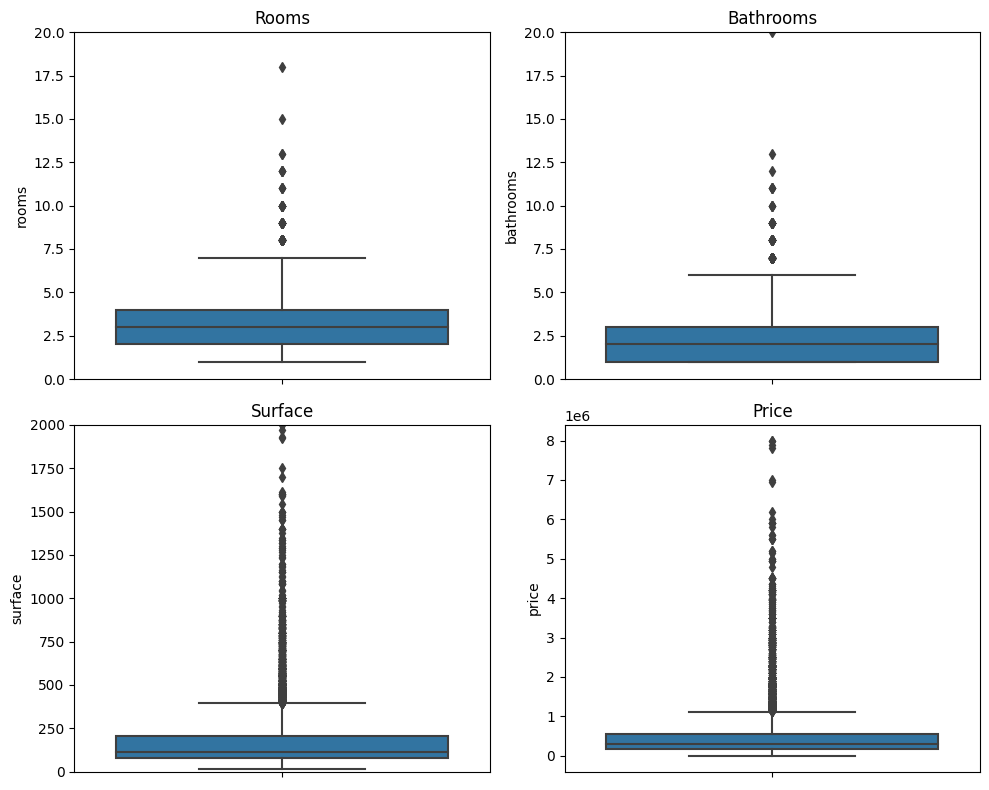

In [25]:
# Plot a Boxplot for the Variables

import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot using Seaborn
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.boxplot(ax=axes[0, 0], data=df, y='rooms').set_ylim(0,20)
sns.boxplot(ax=axes[0, 1], data=df, y='bathrooms').set_ylim(0, 20)
sns.boxplot(ax=axes[1, 0], data=df, y='surface').set_ylim(0, 2000)
sns.boxplot(ax=axes[1, 1], data=df, y='price')

# Set titles for each subplot
axes[0, 0].set_title('Rooms')
axes[0, 1].set_title('Bathrooms')
axes[1, 0].set_title('Surface')
axes[1, 1].set_title('Price')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()